In [33]:
%load_ext autoreload
%autoreload 2


# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tqdm import tqdm
import scipy.cluster.hierarchy as sch

from utils import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Dataset
genedata = pd.read_csv("genedata.csv")
genedata.head()

,id,class,f1,f2,f3,f4,f5,f6,f7,f8,...,f6991,f6992,f6993,f6994,f6995,f6996,f6997,f6998,f6999,f7000
0,1,5,2.3383,10.5440,11.4653,10.4441,10.6311,7.7036,9.6444,7.8501,...,11.9394,11.1349,5.7066,8.2176,9.9062,9.0815,10.5098,11.8648,8.4341,6.7618
1,2,4,3.9151,9.5815,10.3992,9.8333,8.9781,7.0265,9.2761,7.3903,...,11.6547,7.7178,9.3558,7.5026,10.2106,8.9278,10.2466,11.3329,7.8209,7.4350
2,3,5,2.9322,9.3102,11.0756,9.8490,9.4291,8.0618,8.3874,7.9274,...,11.9372,11.2369,6.5860,9.1668,10.3315,9.7551,11.4392,10.7036,8.0041,8.5380
3,4,5,3.9470,8.5315,10.9836,9.3676,9.6856,7.5842,8.5774,8.3737,...,13.2541,11.8221,9.5261,7.4231,11.2862,9.8992,10.4067,11.9044,7.9843,8.5370
4,5,1,4.4618,9.1392,10.9183,10.0490,9.8290,6.5658,9.8122,9.0646,...,11.6416,11.5142,6.5539,7.8319,11.0100,10.1013,11.2682,10.8969,8.1959,8.2906


## Feature analysis

In [3]:
# check for missing values
genedata.isnull().sum().sum()

0

In [4]:
# check datatype of features
dtypes = [genedata[col].dtypes for col in genedata.columns[2:]]
set(dtypes)   

{dtype('float64')}

## Preprocessing

### Data dimension reduction

We can use Principal Component Analysis to reduce the dimensionality of the data while still keeping most of the variance of the original data.

PCA works by creating an eigendecomposition of the data matrix and transforming the data using the first k eigenvectors corresponding to the largest eigenvalues. 

In [35]:
datasets = ['zscore', 'minmax', 'mean']
genedatas_reduced = [preprocess(genedata, method, 2) for method in datasets]

In [19]:
# genedata_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
0,-4.132563,9.073481,7.177347,1.437480,1.327918,2.932044,-0.812744,-1.947227,-0.185456,-0.067476,...,-0.118318,-0.011387,0.135083,0.172238,-0.154442,-0.149913,-0.056262,0.014598,0.014979,-0.146063
1,-1.657746,0.822933,-6.401805,-0.460250,-1.889815,2.930043,-1.226737,2.259959,-2.109221,2.269255,...,-0.000681,0.152368,0.074607,-0.094614,0.064792,-0.035485,-0.154823,-0.066129,-0.008349,0.004812
2,-7.766110,-1.719634,2.174194,-4.478250,2.831770,0.820679,2.653501,3.442032,-3.041428,0.900515,...,-0.017594,0.041892,-0.034479,0.004938,0.006195,-0.023321,0.029361,-0.024548,0.025585,-0.017687
3,-4.991720,-1.129974,5.766439,-3.130196,0.820623,1.939212,-0.158954,1.710845,-1.543884,0.914584,...,-0.231196,0.039214,-0.066564,-0.020823,0.280108,-0.079424,0.053470,-0.067752,0.030700,0.074794
4,-2.261060,-4.700500,1.290003,2.076464,2.029795,-0.627158,-1.071179,-1.486582,-0.174421,-2.744142,...,-0.093775,0.114256,0.040499,-0.021530,-0.258112,-0.079197,0.107020,0.109159,0.059219,0.010723


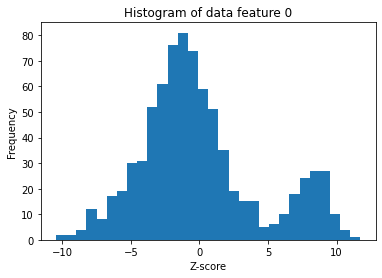

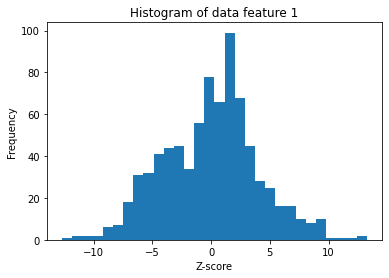

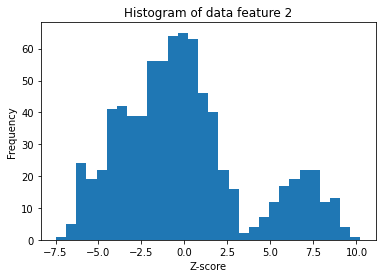

In [14]:
# plot_hist(genedata_reduced)

## K-means clustering

100%|██████████| 12/12 [00:27<00:00,  2.29s/it]


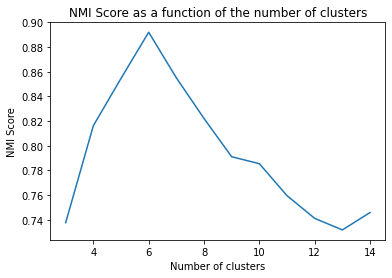

0.8920051050041518


In [15]:
scores = []
n_clusters = range(3, 15)
truth = genedata['class'].values - 1
for k in tqdm(n_clusters):
    preds, km = kmeans(genedata[genedata.columns.values[2:]], k)
    score = nmi(truth, preds, k)
    scores.append(score)
plt.plot(n_clusters, scores)
plt.xlabel("Number of clusters")
plt.ylabel("NMI Score")
plt.title("NMI Score as a function of the number of clusters")
plt.show()

print(max(scores))

100%|██████████| 12/12 [00:03<00:00,  3.47it/s]


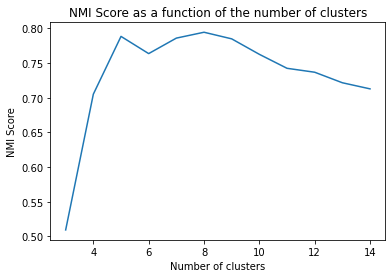

100%|██████████| 12/12 [00:03<00:00,  3.58it/s]


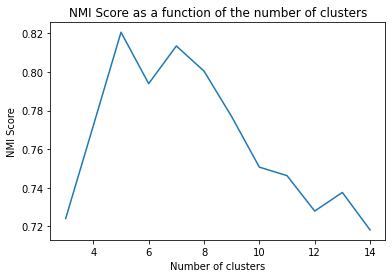

100%|██████████| 12/12 [00:03<00:00,  3.51it/s]


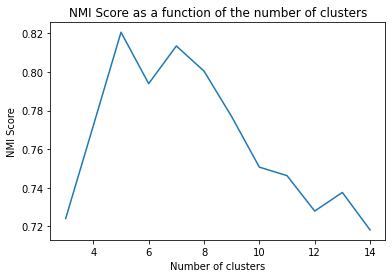

0.820537892466068


In [23]:
for genedata_reduced in genedatas_reduced:
    scores = []
    n_clusters = range(3, 15)
    truth = genedata['class'].values - 1
    for k in tqdm(n_clusters):
        preds, km = kmeans(genedata_reduced, k)
        score = nmi(truth, preds, k)
        scores.append(score)
    plt.plot(n_clusters, scores)
    plt.xlabel("Number of clusters")
    plt.ylabel("NMI Score")
    plt.title("NMI Score as a function of the number of clusters")
    plt.show()

    print(max(scores))

## Hierarchical clustering

In [28]:
linkages = ['single', 'complete', 'average', 'centroid']
linkages_func = [sch.single, sch.complete, sch.average, sch.centroid]


In [103]:
scores = {}
for d in datasets:
    scores[d] = dict(zip(linkages, [[] for x in range(len(linkages))]))

print(scores)

{'zscore': {'single': [], 'complete': [], 'average': [], 'centroid': []}, 'minmax': {'single': [], 'complete': [], 'average': [], 'centroid': []}, 'mean': {'single': [], 'complete': [], 'average': [], 'centroid': []}}


In [108]:
scores = {}
for d in datasets:
    scores[d] = dict(zip(linkages, [[] for x in range(len(linkages))]))

for genedata_reduced, dataset in zip(genedatas_reduced, datasets):
    n_clusters = range(3, 35)
    truth = genedata['class'].values - 1
    for k in tqdm(n_clusters):
        agglo_func(genedata_reduced, linkages, linkages_func, k, dataset, scores, truth)
        # score = nmi(truth, preds, k)
        # scores.append(score)


100%|██████████| 32/32 [00:20<00:00,  1.55it/s]


32


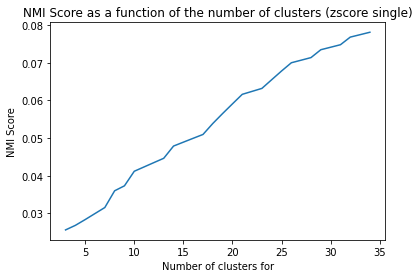

0.07813400317435086
32


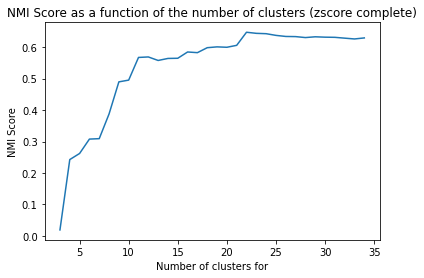

0.6474106022845566
32


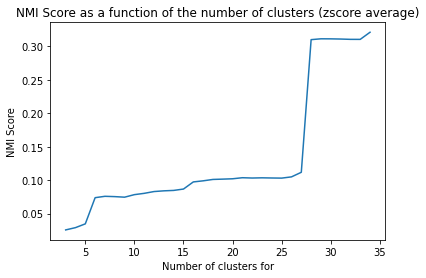

0.3210899974314795
32


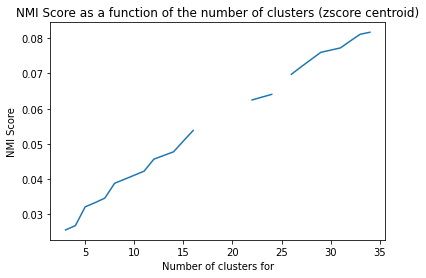

0.08169124767450467
32


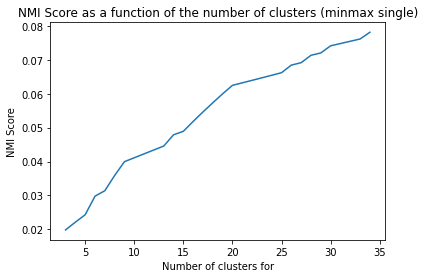

0.07813400317435087
32


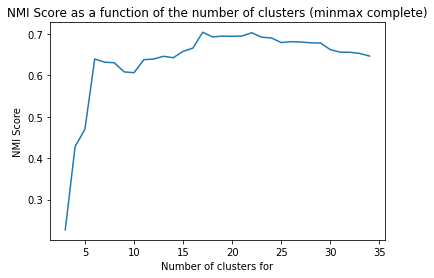

0.7042799707652174
32


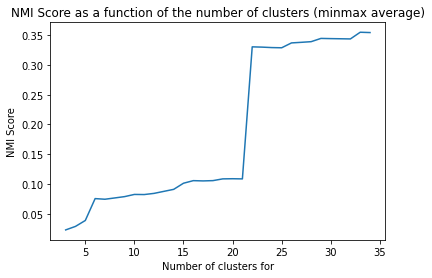

0.35505384591646416
32


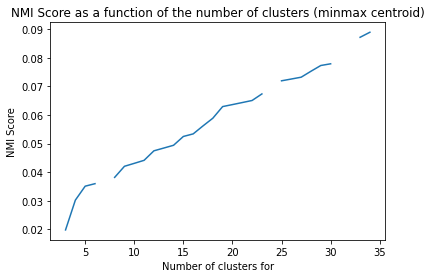

0.08891648053656334
32


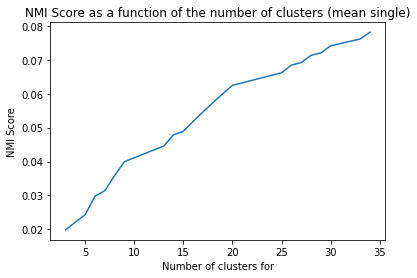

0.07813400317435087
32


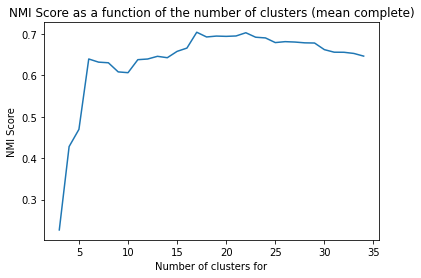

0.7042799707652174
32


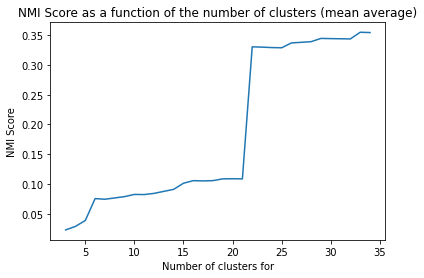

0.35505384591646416
32


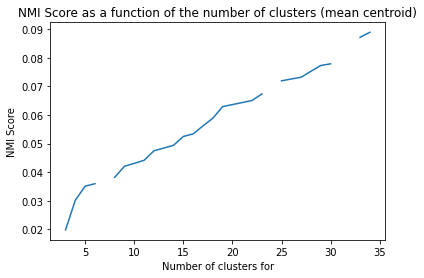

0.08891648053656334


In [109]:

for datas in scores.keys():
    for link in scores[datas].keys():
        score_arr = scores[datas][link]
        plt.plot(n_clusters, score_arr)
        plt.xlabel("Number of clusters for")
        plt.ylabel("NMI Score")
        plt.title(f"NMI Score as a function of the number of clusters ({datas} {link})")
        plt.show()
        print(max(score_arr))

In [105]:
len(scores['mean']['single'])

2

In [97]:
print(scores)

{'zscore': {'single': [0.025605433987557064, 0.02681620995547014], 'complete': [0.019051306239391556, 0.24266109968891786], 'average': [0.025605433987557064, 0.02901530120768842], 'centroid': [0.025605433987557064, 0.02681620995547014]}, 'minmax': {'single': [0.01984176057802558, 0.022130300878097274], 'complete': [0.22663885113829585, 0.42802457166113717], 'average': [0.022828052641341186, 0.028746998525984432], 'centroid': [0.01984176057802558, 0.030251981302719597]}, 'mean': {'single': [0.01984176057802558, 0.022130300878097274], 'complete': [0.22663885113829585, 0.42802457166113717], 'average': [0.022828052641341186, 0.028746998525984432], 'centroid': [0.01984176057802558, 0.030251981302719597]}}


In [120]:
score_np = {'data': {}}
score_np['data'] = dict(zip(linkages, [[] for x in range(len(linkages))]))
print(score_np)

{'data': {'single': [], 'complete': [], 'average': [], 'centroid': []}}


In [121]:
for k in tqdm(n_clusters):
    agglo_func(genedata, linkages, linkages_func, k, 'data', score_np, truth)

100%|██████████| 32/32 [03:55<00:00,  7.37s/it]


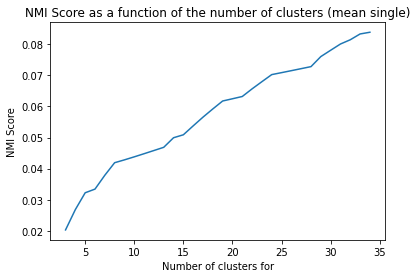

0.08389345653852029


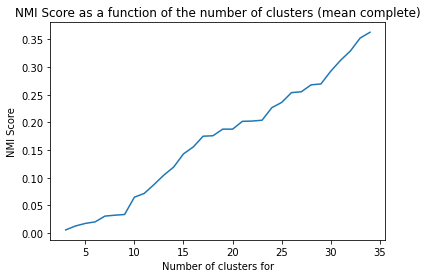

0.36300777577086524


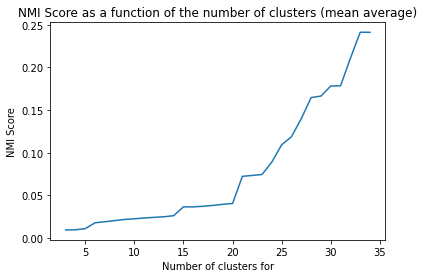

0.24120477900075293


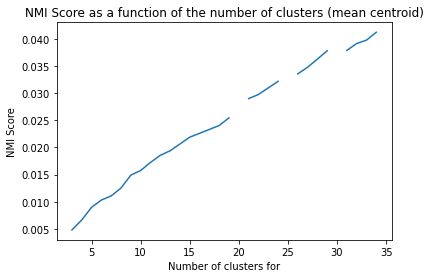

0.041199829204364276


In [123]:
for link in score_np['data'].keys():
    score_arr = score_np['data'][link]
    plt.plot(n_clusters, score_arr)
    plt.xlabel("Number of clusters for")
    plt.ylabel("NMI Score")
    plt.title(f"NMI Score as a function of the number of clusters ({datas} {link})")
    plt.show()
    print(max(score_arr))